<a href="https://colab.research.google.com/github/muthmainnahaisyah/DATMIN_MINI_PROJECT/blob/main/(5)_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDIKSI PENJUALAN PRODUK SPAREPART MOTOR**

## **Import Library**

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import KFold

## **Business Understanding**

### **Business Objective**

Perusahaan distribusi sparepart motor ingin meningkatkan efisiensi operasional dan strategi pemasaran perusahaan untuk memenuhi kebutuhan pelanggan dengan lebih baik. Untuk memenuhi hal tersebut, perusahaan melakukan analisis dengan memprediksi penjualan produk sparepart. Dengan memprediksi penjualan produk sparepart motor dimasa mendatang, perusahaan dapat mengoptimalkan manajemen stok produk. Hal ini akan membantu perusahaan untuk menghindari stok berlebih yang dapat mengakibatkan pengeluaran yang tidak perlu, serta mengurangi risiko kekurangan barang yang menyebabkan mengecewakan pelanggan.

### **Assess Situation**

Perusahaan menghadapi tantangan dalam memperkirakan permintaan sparepart motor dengan akurat, yang dapat menyebabkan stok berlebih atau kekurangan barang. Selain itu, perusahaan ingin memanfaatkan data penjualan sparepart motor untuk menganalisis pola dan tren penjualan perusahaan. Hal ini agar perusahaan dapat merencanakan strategi pemasaran yang lebih efektif dan mengambil keputusan yang lebih baik dalam memanajemen stok produk.

### **Data Mining Goals**

Tujuan analisis data dilakukan untuk mengembangkan model prediksi untuk memperkirakan penjualan sparepart motor di masa mendatang berdasarkan data penjualan sparepart motor. Selain itu, model prediksi dikembangkan agar dapat membantu perusahaan dalam mengidentifikasi pola penjualan serta memprediksi permintaan di masa mendatang dengan tingkat akurasi yang tinggi. Sehingga, perusahaan dapat mengoptimalkan persediaan stok produk, meningkatkan efisiensi operasional, dan meningkatkan kepuasan pelanggan.

### **Project Plan**

Perencanaan proyek yang dilakukan pertama kali adalah dengan mengumpulkan data penjualan sparepart motor dari sumber yang tersedia. Kemudian, dari data tersebut di proses dan di analisis karakteristik serta pola dari data tersebut untuk mengidentifikasi tren penjualan.  Selanjutnya, dilakukan eksplorasi data yang berfokus pada hubungan antara variabel dalam data tersebut dan mengevaluasi data untuk mengetahui keakuratan dan kelengkapan informasi penjualan, lalu melakukan pengembangan model prediktif. Rencana proyek ini dilakukan untuk memastikan bahwa proyek yang dilakukan akan menghasilkan hasil yang relevan dan bermanfaat bagi perusahaan.

## **Data Understanding**

### **Collect Initial Data**

Sumber data yang digunakan dalam analisis ini adalah dataset penjualan sparepart motor sebagai data publik yang di dapatkan melalui website kaggle. Lalu, dataset yang telah diunduh dari kaggle di ekspor pada github yang nantinya digunakan dalam analisis ini.

**Link Dataset Kaggle:**

* https://www.kaggle.com/datasets/devijeganath/motorcycle-sales-analysis/data?select=sales_data.csv


**Link Dataset Github:**
* https://raw.githubusercontent.com/muthmainnahaisyah/DATMIN_MINI_PROJECT/main/sales_data.csv


In [121]:
df = pd.read_csv('https://raw.githubusercontent.com/muthmainnahaisyah/DATMIN_MINI_PROJECT/main/sales_data.csv')
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


### **Describe Data**

#### **Informasi Dasar**

In [122]:
num_rows, num_columns = df.shape

print(f"Jumlah Baris: {num_rows}")
print(f"Jumlah Kolom: {num_columns}")

Jumlah Baris: 1000
Jumlah Kolom: 8


Dalam dataset penjualan sparepart motor terdiri dari **1000 baris** dan **8 kolom**. Maksudnya disini adalah terdapat sejumlah **1000 record** data penjualan sparepart motor dengan mencakup **8 kolom**.

In [123]:
df.count()

date            1000
warehouse       1000
client_type     1000
product_line    1000
quantity        1000
unit_price      1000
total           1000
payment         1000
dtype: int64

Dengan fungsi count() ditampilkan jumlah record pada setiap kolom. Jadi, ditampilkan nama-nama kolom pada dataset dan dapat dilihat pada setiap kolom terdapat record data yang sama, yaitu **1000**.

#### **Informasi Lanjutan**

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1000 non-null   object 
 1   warehouse     1000 non-null   object 
 2   client_type   1000 non-null   object 
 3   product_line  1000 non-null   object 
 4   quantity      1000 non-null   int64  
 5   unit_price    1000 non-null   float64
 6   total         1000 non-null   float64
 7   payment       1000 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB


Informasi lebih detail mengenai struktur dataset mencakup kolom, non-null count, dan tipe data. Total kolom dalam dataset penjualan sparepart motor adalah **8 kolom**. Tipe data dari kolom-kolom dalam dataset ini terdapat **3 jenis**, yaitu **object/string**, **integer**, dan **float**. Berikut adalah penjelasannya:


1. **"date"** : Tanggal transaksi pembelian sparepart motor. Non-Null Countnya adalah 1000 dengan tipe data kolom adalah object/string.
2. **"warehouse"** : Gudang penyimpanan produk. Non-Null Countnya adalah 1000 dengan tipe data kolom adalah object/string.
3. **"client_type"** : Tipe pelanggan saat melakukan pembelian. Non-Null Countnya adalah 1000 dengan tipe data kolom adalah object/string.
4. **"product_line"** : Jenis produk sparepart motor. Non-Null Countnya adalah 1000 dengan tipe data kolom adalah object/string.
5. **"quantity"** : Jumlah unit dari setiap produk. Non-Null Countnya adalah 1000 dengan tipe data kolom adalah integer.
6. **"unit_price"** : Harga satuan dari setiap produk. Non-Null Countnya adalah 1000 dengan tipe data kolom adalah float.
7. **"total"** : Total harga transaksi. Non-Null Countnya adalah 1000 dengan tipe data kolom adalah float.
8. **"payment"** : Jenis pembayaran saat transaksi. Non-Null Countnya adalah 1000 dengan tipe data kolom adalah object/string.



#### **Informasi Statistik Deskriptif**

##### Data Numerik

In [125]:
df.describe()

,quantity,unit_price,total
count,1000.000000,1000.000000,1000.000000
mean,9.395000,30.322040,289.113000
std,9.659207,12.256488,345.227596
min,1.000000,10.030000,10.350000
25%,4.000000,21.085000,93.687500
50%,6.500000,28.570000,178.360000
75%,10.000000,37.917500,321.690000
max,40.000000,66.620000,2546.330000


Dalam dataset penjualan sparepart motor terdapat kolom yang memiliki nilai numerik. Kolom yang memiliki nilai numerik adalah kolom quantity, unit_price, dan total. Berdasarkan hasil diatas, dapat diketahui **jumlah nilai (count)**, **jumlah rata-rata (mean)**, **standar deviasi (std)**, **nilai minimum (min)**, **nilai percentile (terbagi menjadi tiga, yaitu 25%, 50%, dan 75%)**, dan **nilai maksimum (max)** yang dijabarkan pada tiap kolom numerik yang ada dalam dataset. Berikut penjelasannya:

1. **"quantity"** : nilai count adalah 1000.000000, nilai mean adalah 9.395000, nilai std adalah 9.659207, nilai min adalah 1.000000, nilai percentile 25% adalah 4.000000, nilai percentile 50% adalah 6.500000, nilai percentile 75% adalah 10.000000, dan nilai max adalah 40.000000.
2. **"unit_price"** : nilai count adalah 1000.000000, nilai mean adalah 30.322040, nilai std adalah 12.256488, nilai min adalah 10.030000, nilai percentile 25% adalah 21.085000, nilai percentile 50% adalah 28.570000, nilai percentile 75% adalah 37.917500, dan nilai max adalah 66.620000.
3. **"total"** : nilai count adalah 1000.000000, nilai mean adalah 289.113000, nilai std adalah 345.227596, nilai min adalah 10.350000, nilai percentile 25% adalah 93.687500, nilai percentile 50% adalah 178.360000, nilai percentile 75% adalah 321.690000, dan nilai max adalah 2546.330000.

##### Data Kategorikal

In [126]:
df.describe(exclude = np.number)

,date,warehouse,client_type,product_line,payment
count,1000,1000,1000,1000,1000
unique,89,3,2,6,3
top,2021-07-08,Central,Retail,Breaking system,Credit card
freq,20,480,775,230,659


Dalam dataset penjualan sparepart motor terdapat kolom yang memiliki data kategorikal. Kolom yang memiliki data kategorikal adalah date, warehouse, client_type, product_line dan payment. Berdasarkan hasil di atas, dapat diketahui **jumlah nilai (count)**, **jumlah data unique (unique)**, **data yang sering muncul (top)** dan **frekuensinya (freq)**. Jadi hasil diatas menampilkan data yang sering muncul dalam dataset dan disertai dengan jumlah frekuensinya. Berikut adalah penjelasannya:

1. **"date"** : nilai count adalah 1000, data unique adalah 89, data top adalah 2021-07-08, dan jumlah freq adalah 20.
2. **"warehouse"** : nilai count adalah 1000, data unique adalah 3, data top adalah Central, dan jumlah freq adalah 480.
3. **"client_type"** : nilai count adalah 1000, data unique adalah 2, data top adalah Retail, dan jumlah freq adalah 775.
4. **"product_line"** : nilai count adalah 1000, data unique adalah 6, data top adalah Breaking System, dan jumlah freq adalah 230.
5. **"payment"** : nilai count adalah 1000, data unique adalah 3, data top adalah Credit Card, dan jumlah freq adalah 659.

### **Exploratory Data Analysis**

##### Univariate

Berikut adalah visualisasi data yang menampilkan distribusi variabel tunggal.

Text(0.5, 1.0, 'Warehouse')

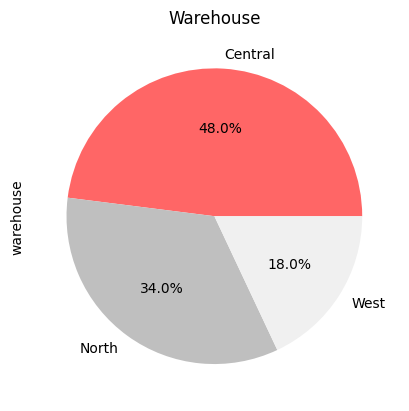

In [127]:
colors = ['#ff6666', '#bfbfbf', '#f0f0f0']

visual_warehouse = df['warehouse'].value_counts()
visual_warehouse.plot(kind='pie', autopct='%1.1f%%', startangle=0, colors=colors)
plt.title('Warehouse')

Berdasarkan visualisasi diatas, dapat dilihat bahwa:
* **Central** menunjukkan bahwa sebesar **48%** dari keseluruhan distribusi produk berada di gudang Central. Gudang Central memiliki proporsi terbesar dari total distribusi, sehingga merupakan gudang utama dan pusat distribusi utama.
* **North** menunjukkan bahwa sebesar **34%** dari keseluruhan distribusi produk berada di gudang North. Gudang North memiliki proporsi yang signifikan, tetapi tidak sebesar proporsi gudang Central.
* **West** menunjukkan bahwa sebesar **18%** dari keseluruhan distribusi produk berada di gudang West. Gudang West memiliki proporsi yang lebih kecil dibandingkan dengan gudang Central dan gudang North. Ini menunjukkan bahwa gudang West memiliki peran yang lebih kecil dalam distribusi produk dibandingkan gudang-gudang lain.

Text(0.5, 1.0, 'Client Type')

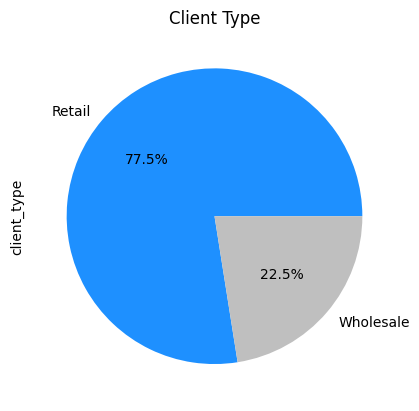

In [128]:
colors = ['#1e90ff', '#bfbfbf']

visual_warehouse = df['client_type'].value_counts()
visual_warehouse.plot(kind='pie', autopct='%1.1f%%', startangle=0, colors=colors)
plt.title('Client Type')

Berdasarkan visualisasi diatas, dapat dilihat bahwa:
* Sebanyak **77.5%** dari total klien yang melakukan transaksi merupakan klient **retail**. Ini menunjukkan bahwa mayoritas transaksi pada perusahaan dilakukan oleh klien retail yang ingin membeli produk untuk kebutuhan pribadi mereka sendiri.
* Sebanyak **22.5%** dari total klien yang melakukan transaksi merupakan klien **grosir (wholesale)**. Meskipun proporsinya lebih kecil dibandingkan dengan klien retail, tetapi klien grosir biasanya membeli produk dengan jumlah yang besar untuk menjualkan kembali kepada konsumen.

Text(0.5, 1.0, 'Payment')

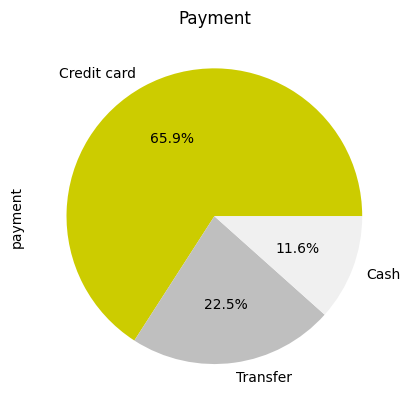

In [129]:
colors = ['#cccc00', '#bfbfbf', '#f0f0f0']

visual_warehouse = df['payment'].value_counts()
visual_warehouse.plot(kind='pie', autopct='%1.1f%%', startangle=0, colors=colors)
plt.title('Payment')

Berdasarkan visualisasi diatas, dapat dilihat bahwa:
* Sebanyak **65.9%** dari metode pembayaran dilakukan dengan menggunakan **kartu kredit**. Ini menunjukkan bahwa mayoritas pembayaran dilakukan menggunakan kartu kredit.
* Sebanyak **22.5%** dari metode pembayaran dilakukan dengan menggunakan **transfer**. Pembayaran dengan cara transfer banyak dilakukan, tetapi tidak sebanyak yang melakukan pembayaran menggunakan kartu kredit.
* Sebanyak **11.6%** dari metode pembayaran dilakukan dengan menggunakan **uang tunai**. Metode pembayaran tunai lebih sedikit dilakukan dibandingkan metode pembayaran lain.

Text(0.5, 1.0, 'Product Line')

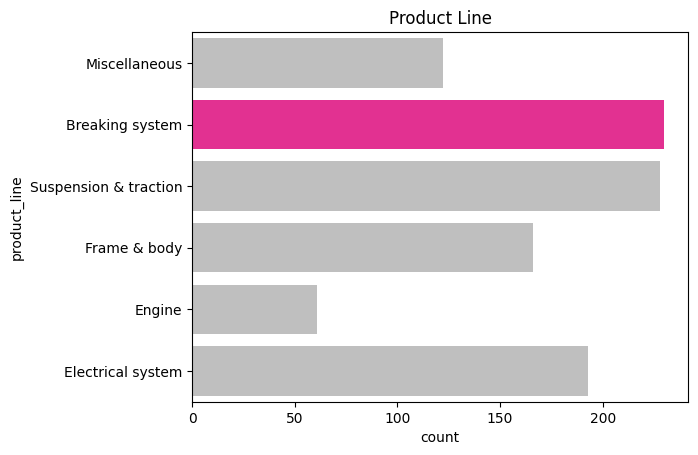

In [130]:
# sns.countplot(df, y = "product_line")
colors = ['#bfbfbf', '#FF1493', '#bfbfbf', '#bfbfbf', '#bfbfbf', '#bfbfbf' ]

sns.countplot(y = "product_line",
              hue = "product_line",
              data = df,
              legend = False,
              palette = colors)
              # data = df,
              # palette = "Greens_d")
plt.title('Product Line')

Berdasarkan visualisasi di atas, dapat dilihat bahwa dari keenam jenis produk sparepart motor (miscellaneous, breaking system, suspension & trantion, frame & body, engine, electrical system) yang paling banyak diminati oleh kalangan pembeli adalah **Breaking System**.

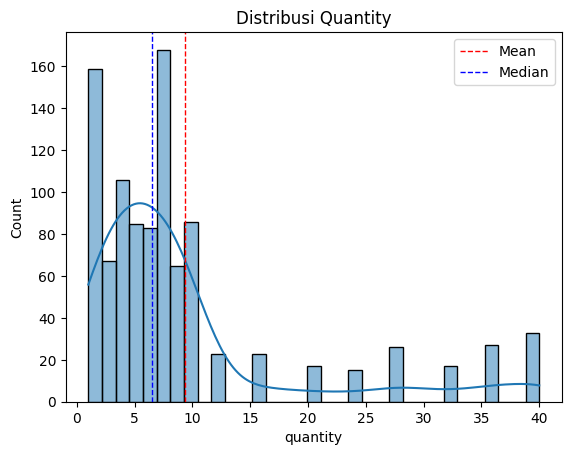

In [131]:
sns.histplot(df["quantity"], kde=True)

plt.axvline(df["quantity"].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df["quantity"].median(), color='blue', linestyle='dashed', linewidth=1, label='Median')
plt.title("Distribusi Quantity")

plt.legend()

Berdasarkan visualisasi di atas, dapat dilihat bahwa puncak kurva lebih ke kiri dari median dan median lebih ke kiri dari mean, sehingga distibusi data tidak membentuk lonceng sempurna. Artinya adalah dari data tersebut lebih banyak pembelian dengan jumlah kecil dibandingkan dengan pembelian dengan jumlah besar.

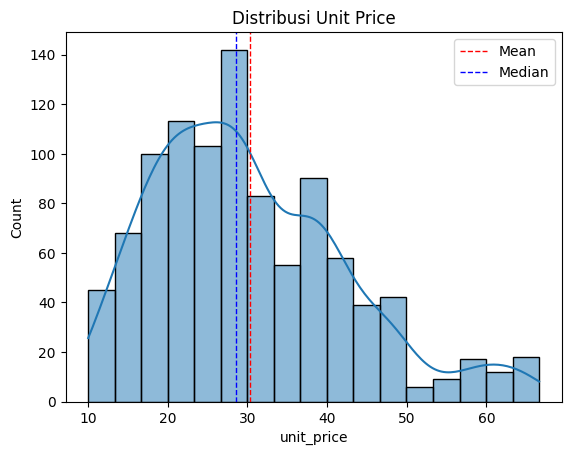

In [132]:
sns.histplot(df["unit_price"], kde=True)

plt.axvline(df["unit_price"].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df["unit_price"].median(), color='blue', linestyle='dashed', linewidth=1, label='Median')
plt.title("Distribusi Unit Price")

plt.legend()

Berdasarkan visualisasi di atas, dapat dilihat bahwa puncak kurva lebih ke kiri dari median dan median lebih ke kiri dari mean, sehingga distibusi data tidak membentuk lonceng sempurna. Artinya adalah dari data tersebut harga produk yang ditawarkan cenderung lebih banyak yang kecil dibandingkan yang besar.

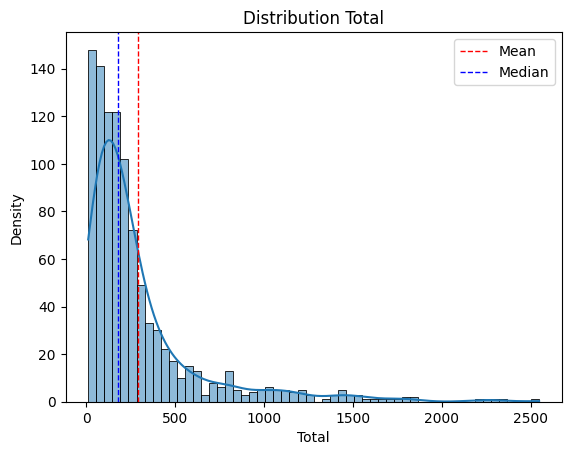

In [133]:
sns.histplot(df["total"], kde=True)

plt.axvline(df["total"].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df["total"].median(), color='blue', linestyle='dashed', linewidth=1, label='Median')

plt.xlabel("Total")
plt.ylabel("Density")
plt.title("Distribution Total")

plt.legend()

Berdasarkan visualisasi di atas, dapat dilihat bahwa puncak kurva lebih ke kiri dari median dan median lebih ke kiri dari mean, sehingga distibusi data tidak membentuk lonceng sempurna. Artinya adalah dari data tersebut lebih banyak pembelian dengan total bayar yang kecil dibandingkan dengan pembelian dengan total bayar yang besar.

##### Bivariate

Berikut adalah visualisasi data yang menampilkan distribusi variabel ganda.

Text(0.5, 1.0, 'Perbandingan pembelian produk berdasarkan tipe pembeli')

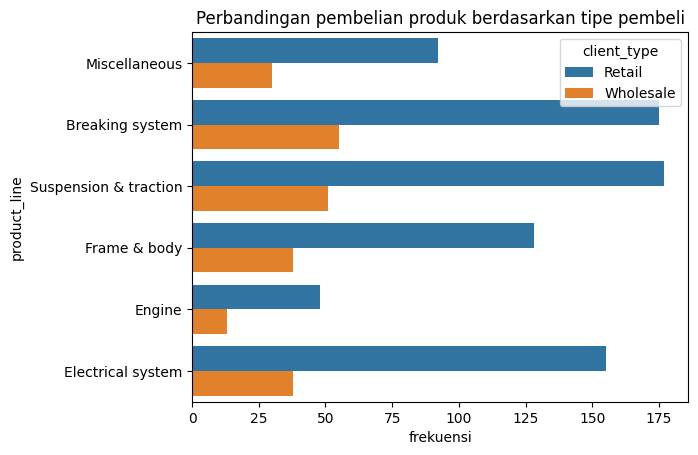

In [134]:
sns.countplot(data=df, y="product_line", hue="client_type")
plt.xlabel("frekuensi")

plt.title("Perbandingan pembelian produk berdasarkan tipe pembeli")

Dari hasil visualisasi di atas dihasilkan sebuah grafik yang menyatakan sebuah perbandingan yang signifikan antara tipe pembeli retail dan wholesale. Hasil menunjukkan bahwa frekuensi pembelian produk miscellaneous, breaking system, suspension & tranction, frame & body, engine, dan electrical system yang dilakukan oleh retail lebih sering ketimbang yang dilakukan oleh wholesale.

Text(0.5, 1.0, 'Perbandingan jenis dan jumlah produk berdasarkan tipe pembeli')

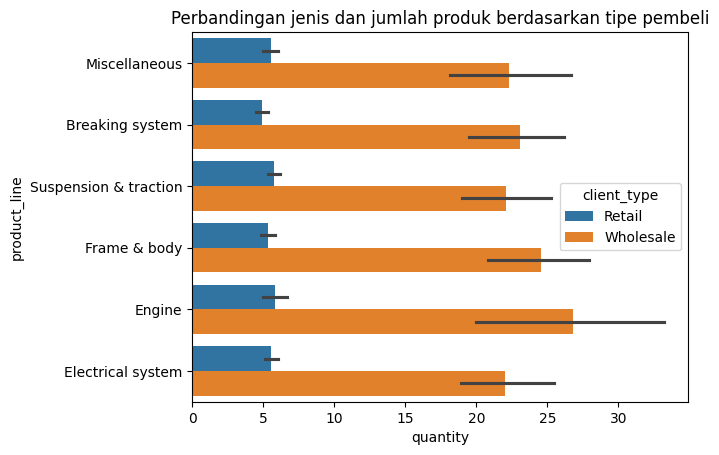

In [135]:
sns.barplot(data=df,  x="quantity", y="product_line", hue="client_type")

plt.title("Perbandingan jenis dan jumlah produk berdasarkan tipe pembeli")

Dari hasil visualisasi di atas dihasilkan sebuah grafik yang menyatakan sebuah perbandingan yang antara jenis produk dengan quantity berdasarkan tipe pembeli. Hasil dari grafik tersebut menunjukkan bahwa jumlah barang tiap produk yang dibeli oleh wholeshale cenderung lebih banyak, sedangkan jumlah barang tiap produk yang dibeli oleh retail cenderung lebih sedikit.

Text(0.5, 1.0, 'Hubungan antara harga produk dengan quantity produk')

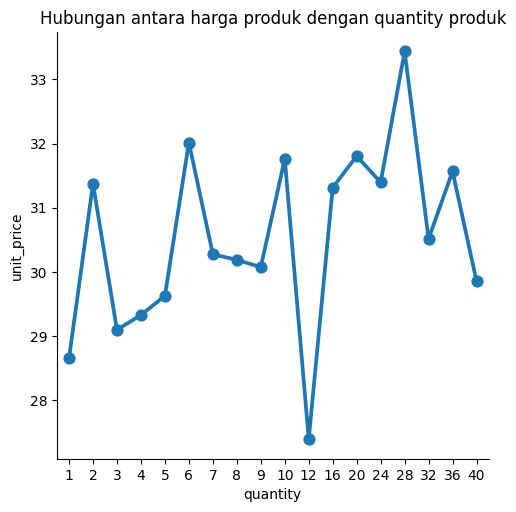

In [136]:
sns.catplot(data=df, x="quantity", y="unit_price", kind = "point", errorbar=None)

plt.title("Hubungan antara harga produk dengan quantity produk")

Dari hasil visualisasi di atas dihasilkan sebuah grafik yang menyatakan hubungan antara quantity dengan harga produk. Dapat dilihat bahwa data tidak konstans. Perubahan pada harga produk tidak mempengaruhi quantity dan perubahan tersebut dapat terjadi karena faktor lain. Sehingga grafik tersebut menunjukkan bahwa harga produk tidak mempengaruhi quantity.

Text(0.5, 1.0, 'Hubungan antara quantity produk dengan total harga')

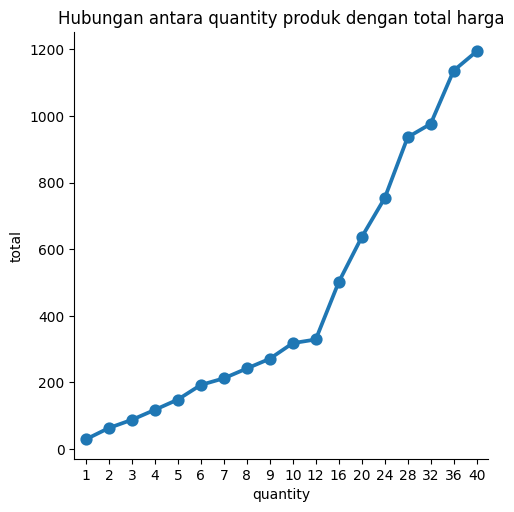

In [137]:
sns.catplot(data=df, x="quantity", y="total", kind = "point", errorbar=None)

plt.title("Hubungan antara quantity produk dengan total harga")

Dari hasil visualisasi di atas dihasilkan sebuah grafik yang menyatakan sebuah hubungan antara quantity produk yang dibeli pelanggan dengan total harga. Jadi semakin banyak quantity produk yang dibeli oleh pelanggan, maka total harga yang dibayarkan juga semakin besar. Sebaliknya, jika semakin sedikit quantity produk yang dibeli oleh pelanggan, maka semakin sedikit juga total harga yang dibayarkan. Sehingga grafik tersebut menunjukkan bahwa quantity berpengaruh positif terhadap total, dikarenakan setiap meningkatnya quantity akan membuat total juga meningkat.

### **Verify Data Quality**

#### Missing Values

In [138]:
missing_values = df.isna().sum()
print(f"Jumlah data kosong:")
missing_values

Jumlah data kosong:


date            0
warehouse       0
client_type     0
product_line    0
quantity        0
unit_price      0
total           0
payment         0
dtype: int64

Berdasarkan hasil diatas, dapat diketahui bahwa tidak ada kolom yang memiliki data kosong atau *NaN* pada dataset penjualan sparepart motor.

#### Outliers Values

In [139]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
quantity,13.5
unit_price,1.8
total,10.2


Berdasarkan hasil di atas, menunjukkan persentase outliers pada kolom tertentu. Berikut adalah penjelasannya:

* Persentase outliers pada kolom quantity menunjukkan persentase sebesar **13.5%** yang artinya terdapat banyak quantity pembelian yang lebih besar dari mayoritas quantity pembelian lainnya.
* Persentase outliers pada kolom unit_price menunjukkan persentasi sebesar **1.8%** yang artinya terdapat beberapa harga produk yang lebih besar dari mayoritas harga produk lainnya.
* Persentase outliers pada kolom total menunjukkan persentase sebesar **10.2%** yang artinya terdapat banyak total harga yang lebih besar dari mayoritas harga produk lainnya.

Dari hasil tersebut outliers akan dipertimbangkan karena beberapa kolom memiliki jumlah data outliers yang banyak dan persentasenya melebihi 5%. Outliers nantinya dapat mempengaruhi dalam melakukan analisis.

#### Duplicated Values

In [140]:
df[df.duplicated()]

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment


Berdasarkan hasil di atas, dapat diketahui bahwa tidak ada baris yang terduplikasi pada dataset penjualan sparepart motor.

## **Data Preparation**

### **Data Cleaning**

#### **Penanganan Missing Values**

**Melakukan Pengecekan Missing Values**

Pengecekan ini dilakukan untuk melihat apakah terdapat missing values pada dataframe. Jika terdapat missing values, maka akan dilakukan sebuah penanganan.

In [141]:
print((df.isna().sum() / len(df)) * 100)

date            0.0
warehouse       0.0
client_type     0.0
product_line    0.0
quantity        0.0
unit_price      0.0
total           0.0
payment         0.0
dtype: float64


Dapat dilihat pada tabel diatas bahwa pada tiap kolom dari dataframe yang dianalisis tidak terdapat sebuah missing values atau nilai yang kosong. Sehingga, dapat disimpulkan bahwa dataframe terhindar dari missing values dan tidak perlu dilakukan penanganan lebih lanjut.

#### **Penanganan Duplicated Values**

**Melakukan Pengecekan Duplicated Values**

Pengecekan ini dilakukan untuk melihat apakah terdapat duplicated values pada dataframe. Jika terdapat duplicated values, maka akan dilakukan sebuah penangana.

In [142]:
df[df.duplicated()]

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment


Dapat dilihat pada hasil diatas bahwa pada tiap baris dari dataframe yang dianalisis tidak terdapat sebuah duplicated values atau duplikasi data. Sehingga, dapat disimpulkan bahwa dataframe terhindar dari duplicated values dan tidak perlu dilakukan penanganan lebih lanjut.

#### **Penanganan Outliers Values**

**Melakukan Pengecekan Outliers Values**

Pengecekan ini dilakukan untuk melihat apakah terdapat outliers values pada dataframe. Jika terdapat outliers values, maka akan dilakukan sebuah penanganan.

In [143]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
quantity,13.5
unit_price,1.8
total,10.2


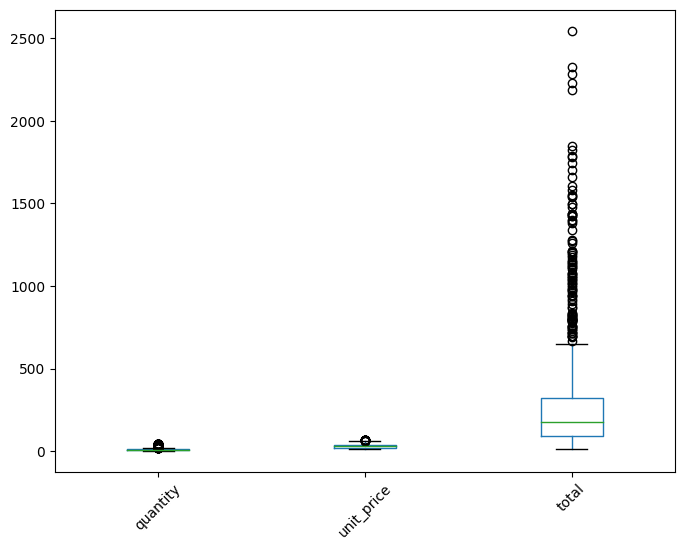

In [144]:
boxplot = df.boxplot(grid=False, rot=45,  figsize=(8,6))

Dari hasil diatas ditampilkan persentase outliers pada kolom numerik dari dataframe yang dianalisis. Kolom yang ditampilkan adalah quantity dengan persentase **13.5%**, unit_price dengan persentase **1.8%**, dan total dengan persentase **10.2%**. Dikarenakan terdapat persentase outliers yang dibawah 10%, maka perlu dilakukan penghapusan outliers pada kolom unit_price.

Kemudian dapat dilihat juga dari boxplot yang telah ditampilkan, bahwa terdapat titik-titik outliers yang berjarak cukup jauh pada kolom total. Oleh karena itu, perlu dilakukan imputasi dengan metode flooring dan capping.

In [145]:
Q1 = df['unit_price'].quantile(0.25)
Q3 = df['unit_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['unit_price'] >= lower_bound) & (df['unit_price'] <= upper_bound)]

Kode diatas adalah kode untuk menghapus outliers pada kolom unit_price.

In [146]:
Q1 = df['total'].quantile(0.25)
Q3 = df['total'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['total']=np.where(df['total']>upper_whisker,upper_whisker,np.where(df['total']<lower_whisker,lower_whisker,df['total']))

<ipython-input-146-56d7a43e3334>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total']=np.where(df['total']>upper_whisker,upper_whisker,np.where(df['total']<lower_whisker,lower_whisker,df['total']))


Kode diatas adalah kode untuk mengimputasi outliers pada kolom total.

In [147]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
quantity,13.441955
unit_price,0.407332
total,0.000000


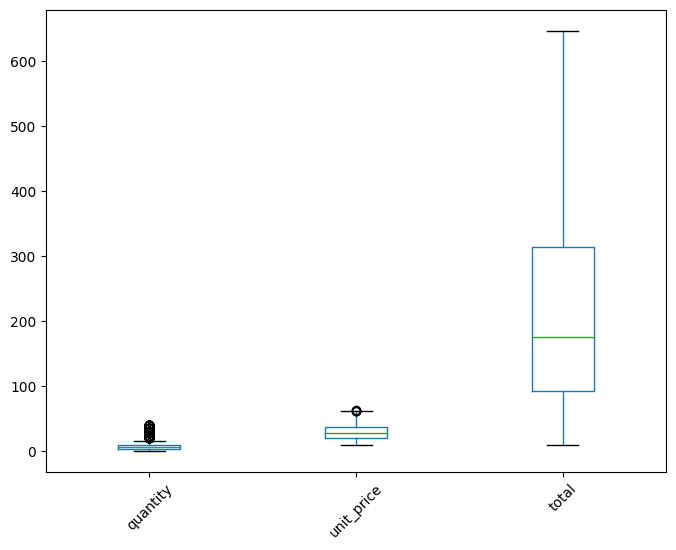

In [148]:
boxplot = df.boxplot(grid=False, rot=45,  figsize=(8,6))

Jadi, setelah melakukan proses menghapusan dan mengimputasi outliers dari dataframe yang akan dianalisis, maka akan ditampilkan hasil seperti diatas, yaitu pada tabel persentase outliers dan boxplot.

### **Construct Data**

#### **Melakukan Penambahan Kolom**

Untuk membantu dan memudahkan proses analisis, perlu dilakukan construct data dengan mengubah struktur data agar sesuai dengan kebutuhan analisis. Pada dataframe yang dianalisis terdapat kolom date yang mencakup tanggal, bulan, dan tahun yang digabungkan menjadi satu. Untuk memudahkan analisis dilakukan penambahan kolom baru, yaitu bulan.

In [149]:
# Membuat kolom baru untuk bulan
df['date'] = pd.to_datetime(df['date'])
df['bulan'] = df['date'].dt.month

# Membuat dictionary nama bulan
nama_bulan = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Mengonversi nilai bulan menjadi nama bulan
df['bulan'] = df['bulan'].map(nama_bulan)

# Menampilkan dataframe
print(df)

          date warehouse client_type           product_line  quantity  \
0   2021-06-01   Central      Retail          Miscellaneous         8   
1   2021-06-01     North      Retail        Breaking system         9   
2   2021-06-01     North      Retail  Suspension & traction         8   
3   2021-06-01     North   Wholesale           Frame & body        16   
4   2021-06-01   Central      Retail                 Engine         2   
..         ...       ...         ...                    ...       ...   
995 2021-08-28   Central      Retail      Electrical system         9   
996 2021-08-28      West   Wholesale        Breaking system        32   
997 2021-08-28      West   Wholesale      Electrical system        12   
998 2021-08-28     North      Retail           Frame & body         5   
999 2021-08-28     North   Wholesale      Electrical system        20   

     unit_price   total      payment   bulan  
0         16.85  134.83  Credit card    June  
1         19.29  173.61      

<ipython-input-149-5761d185e81a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-149-5761d185e81a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bulan'] = df['date'].dt.month
<ipython-input-149-5761d185e81a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

#### **Pengecekan Hasil**

In [150]:
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment,bulan
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card,June
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash,June
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card,June
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer,June
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card,June


Setelah dilakukan proses penambahan kolom, yaitu kolom bulan, maka struktur data dari dataframe telah berubah.

### **Data Reduction**

#### **Penghapusan Kolom**

Dapat dianalisis dari dataframe penjualan produk sparepart motor, bahwa sebelumnya telah ditambahkan kolom bulan. Karena kolom bulan sudah cukup mewakili, maka kolom date perlu dihapuskan agar tidak membuat bingung saat melakukan proses analisis.

In [151]:
df = df.drop(['date'], axis=1)

#### **Pengecekan Hasil**

In [152]:
df.head()

,warehouse,client_type,product_line,quantity,unit_price,total,payment,bulan
0,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card,June
1,North,Retail,Breaking system,9,19.29,173.61,Cash,June
2,North,Retail,Suspension & traction,8,32.93,263.45,Credit card,June
3,North,Wholesale,Frame & body,16,37.84,605.44,Transfer,June
4,Central,Retail,Engine,2,60.48,120.96,Credit card,June


Hasil diatas adalah dataframe terbaru dengan kolom date yang dihapuskan, karena sudah terdapat kolom bulan.

### **Data Transformation**

#### **Melakukan Mapping**

Dari dataframe yang dianalisis, perlu dilakukan transformasi data dengan melakukan proses mapping dengan menerapkan metode ordinal encoding. Mapping ini dilakukan untuk mengubah kolom kategorikal menjadi numerik guna memudahkan dalam melakukan analisis kedepannya.

In [153]:
df['warehouse'] = df['warehouse'].map({'Central':0,'West':1, 'North':2})
df['client_type'] = df['client_type'].map({'Retail': 0, 'Wholesale': 1})
df['product_line'] = df['product_line'].map({'Breaking system': 0, 'Electrical system': 1, 'Engine': 2,
                                             'Frame & body': 3, 'Miscellaneous': 4, 'Suspension & traction': 5})
df['payment'] = df['payment'].map({'Cash': 0, 'Credit card': 1, 'Transfer': 2})
df['bulan'] = df['bulan'].map({'June': 0, 'July': 1, 'August': 2})

Kolom kategorical yang diubah menjadi numerik ada 3, yaitu sebagai berikut.

1. warehouse : data pada warehouse di representasikan dengan angka 0 sebagai central, 1 sebagai west, dan 2 sebagai north.
2. client_type : data pada client_type direpresentasikan dengan angka 0 sebagai retail dan 1 sebagai wholesale.
3. product_line : data pada product_client direpresentasikan dengan angka 0 sebagai breaking system, 1 sebagai electrical system, 2 sebagai engine, 3 sebagai frame & body, 4 sebagai miscellaneous, dan 5 sebagai suspension & tranction.
4. payment : data pada payment direpresentasikan dengan angka 0 sebagai cash, 1 sebagai credit card, dan 2 sebagai transfer.
5. bulan : data pada bulan direpresentasikan dengan angka 0 sebagai june, 1 sebagai july, dan 2 sebagai august.



#### **Pengecekan Hasil**

In [154]:
df.head()

,warehouse,client_type,product_line,quantity,unit_price,total,payment,bulan
0,0,0,4,8,16.85,134.83,1,0
1,2,0,0,9,19.29,173.61,0,0
2,2,0,5,8,32.93,263.45,1,0
3,2,1,3,16,37.84,605.44,2,0
4,0,0,2,2,60.48,120.96,1,0


Hasil diatas adalah hasil dari transformasi data dari yang awalnya kategorikal menjadi numerik. Proses transformasi ini berguna untuk mempermudah proses analisis kedepannya.

### **Konversi Dataframe**

In [155]:
df.to_csv('Data Cleaned.csv', index=False)

## **Modelling**

### **Select Modelling Techniques**

Dalam analisis yang dilakukan kali ini menggunakan model asosiatif. Model asosiatif digunakan untuk mengidentifikasi pola-pola hubungan antara produk-produk dalam penjualan produk sparepart motor. Lebih khusus lagi, untuk melihat korelasi antara produk-produk yang sering dibeli bersama-sama oleh pelanggan. Dengan menggunakan model asosiatif akan mendapat gambaran hubungan antara produk-produk yang akan berguna untuk perusahaan di masa depan. Dalam analisis model asosiatif, terdapat dua jenis algoritma yang digunakan, yaitu K-Means dan Hierarchical Clustering.

1. **K-Means** : algoritma ini adalah salah satu algoritma yang digunakan untuk analisis klaster yang digunakan untuk mengelompokkan data berdasarkan variabel berdasarkan jarak antara data terhadap titik cendoid klaster yang didapatkan melalui proses berulang sebanyak jumlah k. Analisis yang dilakukan menggunakan k-means pada dataframe penjualan produk sparepart motor bertujuan untuk untuk mengelompokkan data penjualan produk sparepart motor berdasarkan pola pembelian produk yang serupa.

2. **Hierarchical Clustering** : algoritma ini adalah salah satu algoritma yang digunakan untuk analisis klaster dengan membangun sebuah hirarki dari data dengan mengelompokkan entitas-entitas yang memiliki kesamaan dengan tujuan menghasilkan representasi visual hubungan entitas-entitas tersebut. Analisis yang dilakukan menggunakan hierarchical clustering pada dataframe penjualan produk sparepart motor bertujuan untuk membangun hirarki dari data penjualan produk sparepart motor dengan mengelompokkan produk-produk yang memiliki kesamaan.

### **Pre-Processing**

#### **Normalisasi Data**

In [156]:
x_final = df

In [157]:
scaler = MinMaxScaler()

x_final_norm = scaler.fit_transform(x_final)

Dilakukan sebuah normalisasi data dari dataframe yang ada dengan tujuan untuk menyederhanakan perbandingan antar fitur, mempercepat konvergensi algoritma, dan meningkatkan hasil model. Normalisasi dilakukan untuk mengubah rentang tiap kolom numerik menjadi 0 hingga 1 untuk setiap nilainya.

In [158]:
df_x_final_norm = pd.DataFrame(x_final_norm, columns=x_final.columns)

display(df_x_final_norm)

,warehouse,client_type,product_line,quantity,unit_price,total,payment,bulan
0,0.0,0.0,0.8,0.179487,0.128389,0.195715,0.5,0.0
1,1.0,0.0,0.0,0.205128,0.174322,0.256687,0.0,0.0
2,1.0,0.0,1.0,0.179487,0.431099,0.397939,0.5,0.0
3,1.0,1.0,0.6,0.384615,0.523532,0.935636,1.0,0.0
4,0.0,0.0,0.4,0.025641,0.949736,0.173908,0.5,0.0
...,...,...,...,...,...,...,...,...
977,0.0,0.0,0.2,0.205128,0.429970,0.448849,0.5,1.0
978,0.5,1.0,0.0,0.794872,0.000000,0.488359,1.0,1.0
979,0.5,1.0,0.2,0.282051,0.428652,0.602631,1.0,1.0
980,1.0,0.0,0.6,0.102564,0.719503,0.363003,0.0,1.0


Hasil diatas ditampilkan sebuah hasil dari normalisasi yang dilakukan pada dataframe yang digunakan untuk dilakukan analisis. Dan Normalisasi  tersebut membuat rentang tiap kolom numerik menjadi 0 hingga 1.

#### **Validasi Silang**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

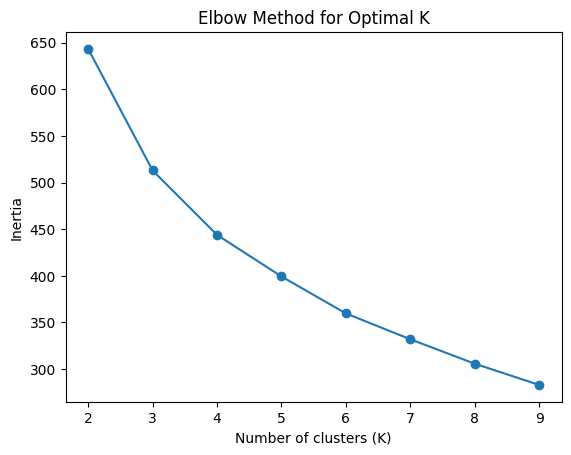

In [159]:
inertia_values = []

k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_final_norm)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.show()

Validasi silang dilakukan pada model asosiatif yang digunakan untuk menemukan jumlah klaster yang optimal. Pada hasil diatas dilakukan validasi silang dengan metode elbow untuk menemukan jumlah klaster optimal dari 2 hingga 9. Untuk menemukannya dilihat dari titik di mana kurva elbow mulai menunjukkan penurunan yang kurang signifikan dan berbentuk seperti siku. Sehingga, dapat disimpulkan dari hasil validasi silang tersebut bahwa jumlah klaster yang optimal adalah 3.

### **Build Model**



#### **K-Means**

In [160]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

Dalam melakukan build model k-means langkah awal dilakukan normalisasi data dan menentukan jumlah kluster. Selanjutnya menginisiasikan syntax seperti diatas dalam melakukan build model k-means. Pada k-means menggunakan 3 kluster dan menggunakan data yang telah dinormalisasikan.

#### **Hierarchical Clustering**

In [161]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc.fit(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=3)

Dalam melakukan build model hierarchical clustering langkah awal dilakukan normalisasi data dan menentukan jumlah kluster. Selanjutnya menginisiasikan syntax seperti diatas dalam melakukan build model hierarchical clustering. Pada hierarchical clustering menggunakan 3 cluster dan menggunakan data yang telah dinormalisasikan.

### **Begins and Compare Predict**

In [162]:
kmeans_clust = kmeans.predict(x_final_norm)
hierarchy_clust = hc.fit_predict(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [163]:
x_final = pd.DataFrame(x_final).reset_index(drop=True)

kmeans_col = pd.DataFrame(kmeans_clust, columns=["kmeans_cluster"])
hierarchy_col = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster"])

combined_data_assoc = pd.concat([x_final, kmeans_col, hierarchy_col], axis=1)

In [164]:
combined_data_assoc.head()

,warehouse,client_type,product_line,quantity,unit_price,total,payment,bulan,kmeans_cluster,hierarchy_cluster
0,0,0,4,8,16.85,134.83,1,0,0,0
1,2,0,0,9,19.29,173.61,0,0,1,2
2,2,0,5,8,32.93,263.45,1,0,1,0
3,2,1,3,16,37.84,605.44,2,0,2,1
4,0,0,2,2,60.48,120.96,1,0,0,0


Setelah semua proses modelling dilakukan, makan ditampilkan dataframe yang telah digabungkan dengan hasil prediksi dari model asosiatif yang dibuat untuk membandingkan hasil dari semua algoritma yang digunakan, yaitu k-means dan hierarchical clustering.

## **Evaluation**

### **Evaluate Results**

In [165]:
silhouette_avg_kmeans = silhouette_score(x_final_norm, kmeans.labels_)
ch_score_kmeans = calinski_harabasz_score(x_final_norm, kmeans.labels_)
db_score_kmeans = davies_bouldin_score(x_final_norm, kmeans.labels_)

silhouette_avg_hc = silhouette_score(x_final_norm, hierarchy_clust)
ch_score_hc = calinski_harabasz_score(x_final_norm, hierarchy_clust)
db_score_hc = davies_bouldin_score(x_final_norm, hierarchy_clust)

metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores_kmeans = [silhouette_avg_kmeans, ch_score_kmeans, db_score_kmeans]
scores_hc = [silhouette_avg_hc, ch_score_hc, db_score_hc]

df_scores = pd.DataFrame({'': metrics,
                          'KMeans Score': scores_kmeans,
                          'Agglomerative Clustering Score': scores_hc})

df_scores = df_scores.set_index('')

df_scores = df_scores.T

display(df_scores)

,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
KMeans Score,0.265384,415.967384,1.426523
Agglomerative Clustering Score,0.244320,379.939730,1.561643


Dari hasil perhitungan score dalam tahap evaluate results, dapat dinyatakan bahwa:

1. **KMeans Score** memiliki Silhuette Score sebesar 0.265384 yang menunjukkan bahwa data cenderung cocok dengan kluster terbagi. Lalu terdapat juga Calinski-Harabasz Score sebesar 415.967384 yang menunjukkan bahwa kluster terpisah dengan baik. Kemudian, untuk Davies-Bouldin Score sebesar 1.426523 yang menunjukkan bahwa kluster memiliki pemisahan yang baik juga.
2. **Agglomerative Clustering Score** memiliki Silhuette Score sebesar 0.244320, jika dibandingkan dengan KMeans, score yang dimiliki Agglomerative Clustering lebih rendah sehingga menunjukkan bahwa data KMeans lebih cocok ketimbang Agglomerative Clustering. Lalu terdapat juga Calinski-Harabasz Score sebesar 397.939730, semakin besar scorenya maka akan semakin baik juga kluster terpisah. Namun, jika membandingkan score Agglomerative dengan KMeans menunjukkan bahwa score Agglomerative lebih rendah dibandingkan dengan KMeans. Kemudian, untuk Davies-Bouldin Score sebesar 1.561643. Semakin rendah scorenya, maka semakin baik juga pemisahannya, namun jika dibandingkan score Agglomerative Cluster lebih tinggi ketimbang KMeans.

Sehingga dapat disimpulkan bahwa diantara kedua model tersebut, model K-Means cenderung memberikan hasil yang lebih baik ketimbang Agglomerative Clustering/Hierarchical Clustering. Hal tersebut terlihat dari score Silhuette dan Calinski-Harabasz yang tinggi dan score Davies-Bouldin yang rendah. Ini menunjukkan hasil yang optimal dan algoritma tersebut cukup ideal untuk dilakukan pengukuran.

### **Review Process**

#### **Cross Validation**

##### **KFold**

###### K-Means

In [173]:
kmeans = KMeans(n_clusters=3, n_init=10)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

silhouette_scores = []
ch_scores = []
db_scores = []

for train_index, test_index in kf.split(x_final_norm):
    x_train, x_test = x_final_norm[train_index], x_final_norm[test_index]

    kmeans.fit(x_train)
    kmeans_labels = kmeans.predict(x_test)

    silhouette_scores.append(silhouette_avg_kmeans)
    ch_scores.append(ch_score_kmeans)
    db_scores.append(db_score_kmeans)

avg_kmeans_silhouette = sum(silhouette_scores) / len(silhouette_scores)
avg_kmeans_ch = sum(ch_scores) / len(ch_scores)
avg_kmeans_db = sum(db_scores) / len(db_scores)

print("Average Silhouette Score (KFold - KM):", avg_kmeans_silhouette)
print("Average Calinski-Harabasz Score (KFold - KM):", avg_kmeans_ch)
print("Average Davies-Bouldin Score (KFold - KM):", avg_kmeans_db)

Average Silhouette Score (KFold - KM): 0.2653841121933068
Average Calinski-Harabasz Score (KFold - KM): 415.9673840608746
Average Davies-Bouldin Score (KFold - KM): 1.426523217256511


 Langkah di atas dilakukan untuk evaluasi kinerja model KMeans dalam tugas clustering menggunakan pendekatan validasi silang KFold. Melalui proses ini, data dibagi menjadi lipatan yang saling terpisah untuk memvalidasi model secara lebih akurat. Setiap lipatan digunakan sebagai data uji sementara yang lainnya sebagai data latih. Model KMeans dilatih pada data latih dari setiap lipatan dan kemudian dievaluasi menggunakan data uji untuk menghitung skor evaluasi seperti silhouette score, Calinski-Harabasz score, dan Davies-Bouldin score. Skor-skor ini kemudian dirata-ratakan untuk memberikan gambaran yang lebih menyeluruh tentang kinerja model KMeans secara keseluruhan. Tujuan dari evaluasi ini adalah untuk memahami seberapa baik model mampu melakukan pengelompokan data menjadi kluster yang bermakna dan seberapa optimal model tersebut terhadap variasi dalam data, sehingga memungkinkan pemilihan model yang paling sesuai untuk tujuan analisis data yang dihadapi.

###### Hierarchical Clustering

In [174]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

silhouette_scores = []
ch_scores = []
db_scores = []

for train_index, test_index in kf.split(x_final_norm):
    x_train, x_test = x_final_norm[train_index], x_final_norm[test_index]

    hierarchy_clust = AgglomerativeClustering(n_clusters=3)
    hierarchy_clust.fit(x_train)
    hierarchy_labels = hierarchy_clust.fit_predict(x_test)

    silhouette_scores.append(silhouette_avg_hierarchy)
    ch_scores.append(ch_score_hierarchy)
    db_scores.append(db_score_hierarchy)

avg_hierarchy_silhouette = sum(silhouette_scores) / len(silhouette_scores)
avg_hierarchy_ch = sum(ch_scores) / len(ch_scores)
avg_hierarchy_db = sum(db_scores) / len(db_scores)

print("Average Silhouette Score (KFold - HC):", avg_hierarchy_silhouette)
print("Average Calinski-Harabasz Score (KFold - HC):", avg_hierarchy_ch)
print("Average Davies-Bouldin Score (KFold - HC):", avg_hierarchy_db)

Average Silhouette Score (KFold - HC): 0.25237229230435854
Average Calinski-Harabasz Score (KFold - HC): 77.48415924842318
Average Davies-Bouldin Score (KFold - HC): 1.4803398882348084


Langkah di atas dilakukan untuk evaluasi kinerja Hierarchical Clustering menggunakan pendekatan validasi silang KFold. Melalui proses ini, data dibagi menjadi lipatan yang saling terpisah untuk memvalidasi model secara lebih akurat. Setiap lipatan digunakan sebagai data uji sementara yang lainnya sebagai data latih. Model Hierarchical Clustering dilatih pada data latih dari setiap lipatan dan kemudian dievaluasi menggunakan data uji untuk menghitung skor evaluasi seperti silhouette score, Calinski-Harabasz score, dan Davies-Bouldin score. Skor-skor ini kemudian dirata-ratakan untuk memberikan gambaran yang lebih menyeluruh tentang kinerja model Hierarchical Clustering secara keseluruhan. Tujuan dari evaluasi ini adalah untuk memahami seberapa baik model mampu melakukan pengelompokan data menjadi kluster yang bermakna dan seberapa optimal model tersebut terhadap variasi dalam data, sehingga memungkinkan pemilihan model yang paling sesuai untuk tujuan analisis data yang dihadapi.

###### Hasil

Jadi, dari kedua langkah yang dilakukan tersebut didapatkan bahwa model KMeans lebih optimal dibandingkan dengan model Hierarchical Clustering saat dilihat melalui rata-rata yang sudah melalui proses perhitungan dari score evaluasi silhouette score, Calinski-Harabasz score, dan Davies-Bouldin score.

##### **Validasi Silang KMeans dan Hierarchical Clustering**

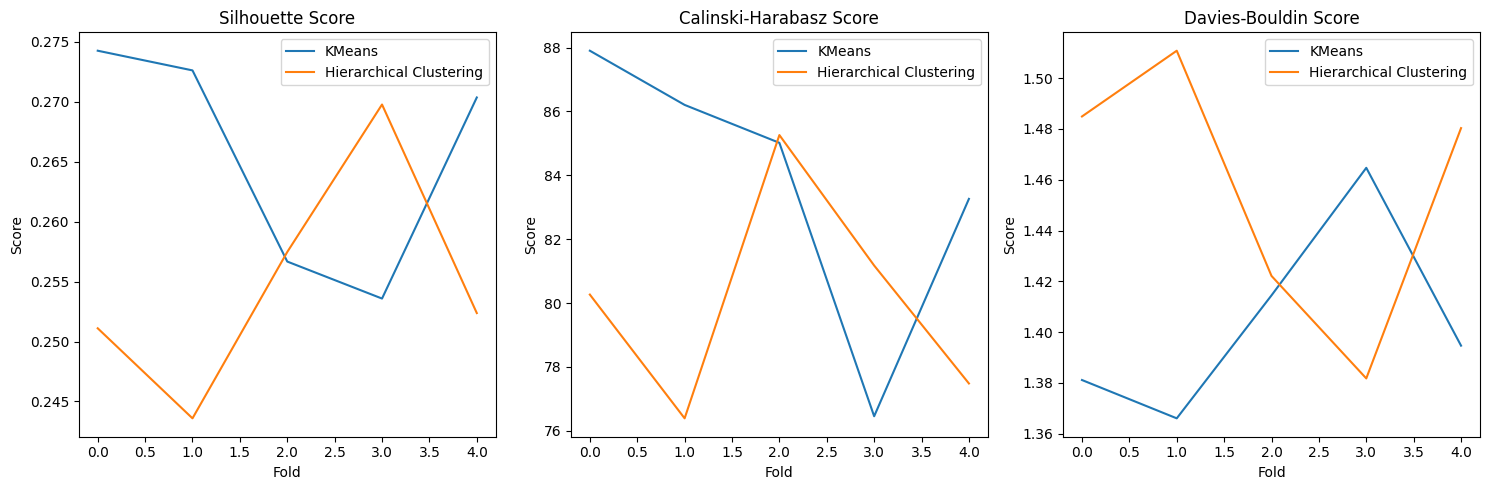

In [175]:
kmeans = KMeans(n_clusters=3, n_init=10)

hierarchy_clust = AgglomerativeClustering(n_clusters=3)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

kmeans_scores = {'silhouette': [], 'calinski_harabasz': [], 'davies_bouldin': []}
hierarchy_scores = {'silhouette': [], 'calinski_harabasz': [], 'davies_bouldin': []}

for train_index, test_index in kf.split(x_final_norm):
    x_train, x_test = x_final_norm[train_index], x_final_norm[test_index]

    kmeans.fit(x_train)
    kmeans_labels = kmeans.predict(x_test)

    silhouette_kmeans = silhouette_score(x_test, kmeans_labels)
    ch_kmeans = calinski_harabasz_score(x_test, kmeans_labels)
    db_kmeans = davies_bouldin_score(x_test, kmeans_labels)

    kmeans_scores['silhouette'].append(silhouette_kmeans)
    kmeans_scores['calinski_harabasz'].append(ch_kmeans)
    kmeans_scores['davies_bouldin'].append(db_kmeans)

    hierarchy_clust.fit(x_train)
    hierarchy_labels = hierarchy_clust.fit_predict(x_test)

    silhouette_hierarchy = silhouette_score(x_test, hierarchy_labels)
    ch_hierarchy = calinski_harabasz_score(x_test, hierarchy_labels)
    db_hierarchy = davies_bouldin_score(x_test, hierarchy_labels)

    hierarchy_scores['silhouette'].append(silhouette_hierarchy)
    hierarchy_scores['calinski_harabasz'].append(ch_hierarchy)
    hierarchy_scores['davies_bouldin'].append(db_hierarchy)

df_kmeans_scores = pd.DataFrame(kmeans_scores)
df_hierarchy_scores = pd.DataFrame(hierarchy_scores)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.lineplot(data=df_kmeans_scores['silhouette'], markers=True, label='KMeans')
sns.lineplot(data=df_hierarchy_scores['silhouette'], markers=True, label='Hierarchical Clustering')
plt.title('Silhouette Score')
plt.xlabel('Fold')
plt.ylabel('Score')

plt.subplot(1, 3, 2)
sns.lineplot(data=df_kmeans_scores['calinski_harabasz'], markers=True, label='KMeans')
sns.lineplot(data=df_hierarchy_scores['calinski_harabasz'], markers=True, label='Hierarchical Clustering')
plt.title('Calinski-Harabasz Score')
plt.xlabel('Fold')
plt.ylabel('Score')

plt.subplot(1, 3, 3)
sns.lineplot(data=df_kmeans_scores['davies_bouldin'], markers=True, label='KMeans')
sns.lineplot(data=df_hierarchy_scores['davies_bouldin'], markers=True, label='Hierarchical Clustering')
plt.title('Davies-Bouldin Score')
plt.xlabel('Fold')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

Berdasarkan validasi silang yang dilakukan dan disajikan dalam bentuk plot, maka dapat dinyatakan bahwa:

1. **Silhouette Score**: Silhouette score mengukur seberapa baik setiap data point diklasifikasikan dalam clusternya. Skor yang lebih tinggi menunjukkan clustering yang lebih baik. Plot ini menunjukkan silhouette score untuk berbagai jumlah fold dan KMeans memiliki skor yang lebih tinggi.

2. **Calinski-Harabasz Score**: Calinski-Harabasz score adalah metrik lain untuk mengevaluasi clustering. Skor yang lebih tinggi menunjukkan clustering yang lebih baik. Plot ini menunjukkan Calinski-Harabasz score untuk berbagai jumlah fold dan KMeans memiliki skor yang lebih tinggi.

3. **Davies-Bouldin Score**: Davies-Bouldin score adalah metrik yang mengukur scatter antar cluster. Skor yang lebih rendah menunjukkan clustering yang lebih baik. Plot ini menunjukkan Davies-Bouldin score untuk berbagai jumlah fold dan KMeans memiliki skor yang lebih rendah.

Jadi, dapat disimpulkan bahwa KMeans adalah algoritma yang lebih optimal dibandingkan dengan Hierarchical Clustering.

#### **Feature Selection**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


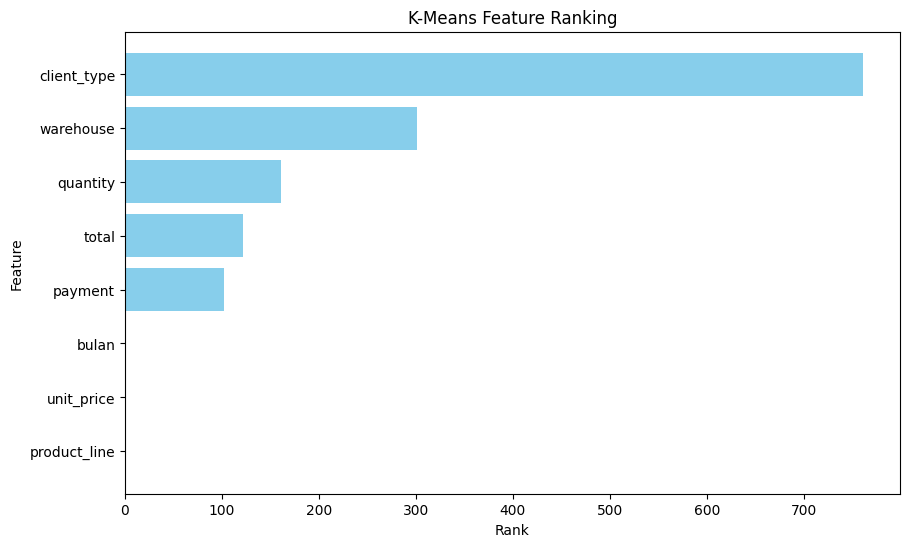

In [169]:
selector = SelectKBest(score_func=chi2, k=3)

kmeans_clust = KMeans(n_clusters=3, random_state=42)

kmeans_clust.fit(x_final_norm)
cluster_labels = kmeans_clust.labels_
selector.fit(x_final_norm, cluster_labels)
feature_ranks = selector.scores_
feature_names = df_x_final_norm.columns

feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})
feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_ranks_df['Feature'], feature_ranks_df['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('K-Means Feature Ranking')
plt.gca().invert_yaxis()
plt.show()

Setelah melakukan cross validation ditentukan bahwa model KMeans adalah algoritma yang paling optimal. Kemudian, dari model tersebut ditentukan fitur-fitur yang memiliki pengaruh terhadap algoritma tersebut dan didapatkan hasil seperti di atas. Dapat dilihat bahwa client_type adalah yang paling berpengaruh karena memiliki rank paling tinggi pertama, diikuti dengan warehouse dengan rank kedua, quantity dengan rank ketiga, total dengan rank keempat, payment dengan rank kelima, dst. Fitur-fitur tersebutlah yang nantinya berpengaruh pada algoritma kedepannya pada saat melakukan analisis.

#### **Tuning Hyperparameter**

In [178]:
kmeans_before_tuning = KMeans(n_clusters=3, n_init=10)

kmeans_after_tuning = KMeans(n_clusters=3, init='k-means++', n_init=20, max_iter=300)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

silhouette_scores_before_tuning = []
silhouette_scores_after_tuning = []

for train_index, test_index in kf.split(x_final_norm):
    x_train, x_test = x_final_norm[train_index], x_final_norm[test_index]

    kmeans_before_tuning.fit(x_train)
    kmeans_labels_before_tuning = kmeans_before_tuning.predict(x_test)
    silhouette_avg_before_tuning = silhouette_score(x_test, kmeans_labels_before_tuning)
    silhouette_scores_before_tuning.append(silhouette_avg_before_tuning)

    kmeans_after_tuning.fit(x_train)
    kmeans_labels_after_tuning = kmeans_after_tuning.predict(x_test)
    silhouette_avg_after_tuning = silhouette_score(x_test, kmeans_labels_after_tuning)
    silhouette_scores_after_tuning.append(silhouette_avg_after_tuning)

avg_silhouette_before_tuning = np.mean(silhouette_scores_before_tuning)
avg_silhouette_after_tuning = np.mean(silhouette_scores_after_tuning)

print("Rata-rata Skor Silhouette Sebelum Tuning:", avg_silhouette_before_tuning)
print("Rata-rata Skor Silhouette Sesudah Tuning:", avg_silhouette_after_tuning)


Rata-rata Skor Silhouette Sebelum Tuning: 0.26401349250511374
Rata-rata Skor Silhouette Sesudah Tuning: 0.26548957468749335


Seperti yang diketahui sebelumnya bahwa KMeans adalah algoritma yang lebih optimal dibandingkan algoritma lain, sehingga langkah selanjutnya yang dilakukan adalah tuning hyperparameter. Tuning Hyperparameter dilakukan pada KMeans sebagai algoritma yang paling optimal untuk melihat perbandingan kinerja algoritma dari sebelum dan sesudah dilakukan tuning. Dapat dilihat hasil tuning diatas bahwa skor sesudah melakukan tuning sedikit meningkat dibandingkan dengan sebelum dilakukan tuning. Dengan demikian, dapat dikatakan bahwa jika mengalami peningkatan menandakan bahwa data dalam keadaan baik.

### **Determine Next Steps**

Dalam tahapan evaluasi adalah tahap yang dilakukan untuk dilakukan pengembangan pada model dengan mengevaluasi hasil yang sebelumnya telah dilakukan. Jadi yang pertama dilakukan adalah melakukan evaluate resul dengan hasil bahwa model KMeans adalah algoritma yang optimal. Kemudian untuk memastikan hal tersebut dilakukan review process dengan melakukan cross validation, fiture selection, dan tuning hyperparameter. Dengan dilakukannya ketiga hal tersebut didapatkan hasil bahwa KMeans merupakan model yang cocok untuk digunakan dalam analisis ini dan terdapat fitur-fitur ikut mempengaruhi, serta setelah dilakukan tuning hyperparameter didapatkan hasil bahwa data yang digunakan dalam keadaan baik karena hasil setelah dilakukan tuning sedikit mengalami peningkatan. Dengan demikian, proses analisis dapat dilanjutkan ketahap selanjutnya dengan menggunakan model KMeans sebagai algoritma yang lebih optimal dibandingkan dengan model Hierarchical Clustering.